Exercício: Implementar uma rede neural com N camadas
        
    - Inicializar parâmetros
    - Forward propagation
        - Linear
        - Ativação (sigmoide)
        - Custo
    - Backpropagation - 
        - Ativação (sigmoide)
        - Linear
    - Atualizar parâmetros
    

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
#from sklearn.model_selection import train_test_split

### Base de dados MNIST

https://www.openml.org/d/554
http://yann.lecun.com/exdb/mnist/

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
type(mnist['data'])

pandas.core.frame.DataFrame

In [5]:
mnist_data = mnist['data'][mnist['target'].isin(['0','1'])]
mnist_data = mnist_data.to_numpy()

In [6]:
mnist_target = mnist['target'][mnist['target'].isin(['0','1'])]
mnist_target = np.array([int(i) for i in mnist_target])

i: 11528 target: 1


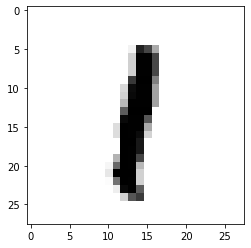

In [7]:
i = np.random.randint(len(mnist_target))

plt.imshow(mnist_data[i].reshape(28,28),cmap='binary')
print(f"""i: {i} target: {mnist_target[i]}""")

In [8]:
mnist_target_sample = mnist_target[:300]
mnist_data_sample  = mnist_data[:300]

In [9]:
mnist_data_sample = mnist_data_sample.T
mnist_target_sample = mnist_target_sample.reshape(mnist_target_sample.shape[0],-1).T
mnist_data_sample.shape, mnist_target_sample.shape

((784, 300), (1, 300))

### Funções

In [10]:
def sigmoid(Z):
    """
    Ativação sigmoide
    
    Arguments:
    Z -- array numpy
    
    Returns:
    A -- valor de sigmoide(z) - vetor de mesmo tamanho que Z
    cache -- uma cópia de Z (útil para o backpropagation)
    """
    #TODO: função sigmoide
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    
    return A, cache


def relu(Z):
    """
    Ativação RELU
    
    Arguments:
    Z -- array numpy
    
    Returns:
    A -- valor de relu(Z) - vetor de mesmo tamanho que Z
    cache -- uma cópia de Z (útil para o backpropagation)
    """
    
    #TODO: funcao RELU
    
    assert (dZ.shape == Z.shape) 
    assert(A.shape == Z.shape)
    
    return A, cache


def relu_backward(dA, cache):
    """
    Derivada da função RELU (utilizada no backpropagation)
    
    Arguments:
    dA -- gradience da ativação da camada posterior
    cache -- valor de Z guardado em cache
    
    Returns:
    dZ -- gradiente em função de Z
    """
    
    Z = cache
    #copia a entrada dA para dZ
    dZ = np.array(dA, copy=True) 
    
    # Atualiza os valores de dZ para 0 quando Z <= 0
    dZ[Z <= 0] = 0
    
    #verifica se os vetores tem mesma dimensao
    assert (dZ.shape == Z.shape) 
    return dZ


def sigmoid_backward(dA, cache):
    """
    Derivada da funcao sigmoide (utilizada no backpropagation)
    
    Arguments:
    dA -- gradience da ativação da camada posterior
    cache -- valor de Z guardado em cache
    
    Returns:
    dZ -- gradiente em função de Z
    """
   
    #TODO: derivada da função sigmoide
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    
    #verifica se os vetores tem mesma dimensao
    assert (dZ.shape == Z.shape)
    
    return dZ

In [11]:
def init_params(layer_dims):
    """
    Arguments:
    layer_dims -- lista de inteiros onde cada elemento é o numero de nós de cada camada da rede
    
    Returns:
    parameters -- dicionario python contendo os parametros "W1", "b1", ..., "WL", "bL":
                    Wl -- matriz de pesos de dimensao: (layer_dims[l], layer_dims[l-1])
                    bl -- vetor de bias de dimensao: (layer_dims[l], 1)
                    
    por exemplo, dado a entrada: 
    layer_dims = [10,20,1]
    a saida deve ser o dicionario com as seguintes matrizes:
    parameters = {
                  'W1': array de dimensao (20,10),
                  'b1': array de zeros de dimensao (20,1),
                  'W2': array de dimensao (1,20),
                  'b2': array de zeros de dimensao (1,1),
                  }
    """
    
    np.random.seed(1)
    parameters = {}
    # numero de camadas na rede
    L = len(layer_dims) 

    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layer_dims[l], layer_dims[l-1]))
        #TODO: inicializar pesos
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        #TODO: inicializar bias
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [15]:
def linear_forward(A, W, b):
    """
    calculo linear do forward propagation
    
    Arguments:
    A -- vetor de ativação da camada anterior (ou da camada inicial de entrada - features) 
    W -- matriz de pesos: array numpy de dimensao: (tamanho layer atual,tamanhho layer anterior)
    b -- bias vector, numpy array de dimensao: (tamanho layer atual, 1)
    
    Returns:
    Z --  (valor a ser utilizado na funcao de ativacao)
    cache -- dicionario python contendo  "A", "W","b" , utilizado no backpropagation
    """
    
    #TODO: funcao linear para encontrar valor de Z
    Z = W.dot(A) + b
    #verifica se dimensao de Z esta correta
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache


def linear_activation_forward(A_prev, W, b, activation):
    """
    Forward propagation. Esta função chama o calculo linear e a função de ativação
    
    Arguments:
    A_prev -- Vetor de ativação da camada anterior (ou vetor de features de entrada) 
              dimensão: (tamanho layer anterior, numero de amostras)
    W -- matriz de pesos: array numpy de dimensão (tamanho layer atual, tamanho layer anterior)
    b -- vetor de bias: array numpy de dimensão (tamanho layer atual, 1)
    activation -- nome da ativação a ser utilizada: string ('sigoid', 'relu')
    
    Returns:
    A -- saida da função de ativação
    cache -- dicionario python contendo "linear_cache" e "activation_cache", utilizados no backpropagation
    """
    
    if activation == "sigmoid":
        #TODO: chamar funcao linear
        #TODO: chamar funcao de ativação sigmoide
        # Entrada "A_prev, W, b". 
        # Saida: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        pass
        #TODO: chamar funcao linear
        #TODO: chamar funcao de ativação relu
        # Entrada "A_prev, W, b". 
        # Saida: "A, activation_cache".
   
    #verifica se dimensao de A esta correta
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    #armazena cache
    cache = (linear_cache, activation_cache)

    return A, cache


def forward(X, parameters):
    """
    Forward propagation 
    - para as camadas L..L-1: [LINEAR->SIGMOID/RELU]*(L-1)
    - para a ultima camada: ->LINEAR->SIGMOID
    
    Arguments:
    X -- dados, array numpy
    parameters -- parametros de inicialização da rede (saida da função init_params() )
    
    Returns:
    AL -- ultima ativação da rede
    caches -- lista de caches
    """

    caches = []
    A = X
    #numero de camadas da rede
    L = len(parameters) // 2 
    
    # percorre camadas L..L-1 [LINEAR -> SIGMOID/RELU]*(L-1). 
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "sigmoid")
        caches.append(cache)
   
    #ativação da ultima camada LINEAR -> SIGMOID.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches


def compute_cost(AL, Y):
    """
    Função de custo
    Arguments:
    AL -- vetor de probabilidades yˆ  de dimensão (1, numero de amostras)
    Y -- labels de dimensão (1, numero de amostras)
    Returns:
    cost -- custo
    """
   
    #numero de amostras
    m = Y.shape[1]

    #TODO: calcular loss L(y^,Y)
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
   
    #transforma custo em valor unico (exemplo: [[1.3]] para 1.3)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [16]:
def linear_backward(dZ, cache):
    """
    Função linear do backpropagation
    
    Arguments:
    dZ -- Gradiente do custo em relacão a saida linear (da camada atual l)
    cache -- tupla com valores (A_prev, W, b) (previamente computados no forward propagation da camada atual)
    
    Returns:
    dA_prev -- Gradiente do custo em relação a ativação da camada anterior l-1 (mesma dimensão de A_prev)
    dW -- Gradiente do custo em relação aos pesos(W) da camada atual l (mesma dimensão de W)
    db -- Gradiente do custo em relação ao bias da camada attual l (mesma dimensão de b)
    """
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    #TODO: calcular gradiente de dW
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True) # gradiente em relação ao bias
    dA_prev = np.dot(W.T, dZ)
    #TODO: calcular gradiente dA_prev (entrada: matriz W transposta, dZ)
   

    # verifica dimensões
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db


def linear_activation_backward(dA, cache, activation):
    """
    Backward propagation. Esta função chama as funcoes de derivacao da ativação do calculo linear.

    Arguments:
    dA -- Gradiente da camada atual l
    cache -- tupla de valores de cache (linear_cache, activation_cache)
    activation -- ativação usada na camada. string: "sigmoid" ou "relu"
    
    Returns:
    dA_prev -- Gradiente do custo em relação a activação da camada anterior l-1. mesma dimensão de A_prev
    dW -- Gradiente do custo em relação aos pesos(W) da camada atual l), mesma dimensão de W
    db -- Gradient do custo em relação ao bias(b) da camada atual l), mesma dimensão de b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        pass
        #TODO: chamar funcao relu_backward
        #TODO: chamar funcao linear_backward
        # Entrada "dA, activation_cache". 
        # Saida: "dA_prev, dW, db".
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
        #TODO: chamar funcao sigmoid_backward
        #TODO: chamar funcao linear_backward
        # Entrada "dA, activation_cache". 
        # Saida: "dA_prev, dW, db".
    
    return dA_prev, dW, db


def backprop(AL, Y, caches):
    """
    Backward propagation para as camadas L..L-1 [LINEAR->SIGMOID/RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- vetor de probabilidades (y^), saida da funcao forward()
    Y -- vetor de labels
    caches -- lista de caches
    
    Returns:
    grads -- Dicionario com os gradientes com formato:
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    #numero de camadas
    L = len(caches) 
    #numero de amostras
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    #inicializa backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    #acessa o cache da ultima camada
    current_cache = caches[L-1]
    #gradiente da última camada (L)
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
   
    #backpropagation das demais camadas (L-1..L) em ordem reversa
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
       
        #gradiente da camada l
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "sigmoid")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads


def update_parameters(parameters, grads, learning_rate):
    """
    Atualiza os parâmetros da rede utilizando gradiente descendente
    
    Arguments:
    parameters -- dicionario com os parametros
    grads -- dicionario com os gradientes (saida do backpropagation)
    
    Returns:
    parameters -- dicionario com os parametros atualizados no formato:
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    #numero de camadas
    L = len(parameters) // 2

    # Update rule for each parameter. Use a for loop.
    #Loop percorrendo as camadas e atualizando os vetores de parâmetros W,b
    for l in range(L):
        #TODO: atualizar os pesos (entrada: learning_rate e grads[dW l+1])
        W_updated = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        #TODO: atualizar o bias (entrada: learning_rate e grads[db l+1])
        b_updated = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        parameters["W" + str(l+1)] = W_updated
        parameters["b" + str(l+1)] = b_updated
        
    return parameters

In [17]:
def train_nn(X, Y, layers_dims, learning_rate, epochs, print_cost=False):
    """
    Treinamento da rede
    
    Arguments:
    X -- dados de dimensão (numero de features,numero de amostras)
    Y -- labels anotados (0,1) de dimensao (1, numero de amostras)
    
    layers_dims -- lista contendo o numero de nos de cada camada
    learning_rate -- taxa de aprendizado
    epochs -- numero de iterações
    print_cost -- imprime o custo a cada 100 iterações 
    
    Returns:
    parameters -- parâmetros aprendidos pelo modelo.
    """

    np.random.seed(1)
    costs = []
    
    parameters = init_params(layers_dims)
    
    for i in range(0, epochs):

        AL, caches = forward(X, parameters)
        
        cost = compute_cost(AL, Y)
    
        grads = backprop(AL, Y, caches)
 
        parameters = update_parameters(parameters, grads, learning_rate)
                
        if print_cost and i % 100 == 0:
            print (f'Cost after {i} epochs: {cost}')
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title(f'Learning rate: {learning_rate}')
    plt.show()
    
    return parameters

In [18]:
def predict(X, y, parameters):
    """
    Função de predição
    
    Arguments:
    X -- dados a serem testados
    y -- labels (para computar acurácia do modelo)
    parameters -- parametros do modelo treinado
    
    Returns:
    p -- valores preditos pelo modelo
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forward(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
            
    acc = np.sum((p == y)/m)
    print(f'Accuracy: {acc}')
    return p

### Run

Cost after 0 epochs: 0.6931471805599453
Cost after 100 epochs: 0.5711569675360915
Cost after 200 epochs: 0.48042405661622906
Cost after 300 epochs: 0.43145673881149427
Cost after 400 epochs: 0.4011879367798027


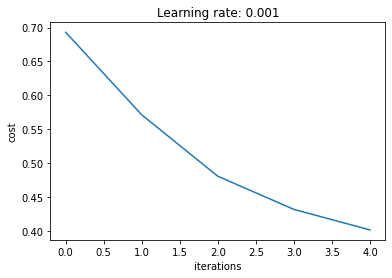

In [19]:
#params
layers_dims = [784,30,1]
learning_rate = 0.001
epochs = 500

#executa o treinamento
parameters = train_nn(mnist_data_sample, mnist_target_sample, layers_dims, learning_rate, epochs, print_cost = True)

In [20]:
predict(mnist_data_sample, mnist_target_sample, parameters)

Accuracy: 1.0000000000000002


array([[0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 